In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyterflame

In [2]:
import weather_routing
import plot_isochron_routes
import pandas
import math
import traceback
import cProfile

In [3]:
year = 2023
##################
min_lat = 21.1
max_lat = 34.1
max_lng = -118
min_lng = -158
# Waypoints for the TransPac 
waypoints = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    #(21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])

# July 1st, 12:00 PST
Start_Date = f"{year}0701"
Start_Time = 19 #19:00 UTC
##################
wind_data_dir = f"historical_wind_data/{year}"
#wind_data_dir = f"/Volumes/Gribs/{year}"

In [4]:
waypoints

,lat,lng,name
0,33.69853,-118.25085,Pt. Fermin Bouy
1,33.48177,-118.64101,Catalina West End


In [5]:
waypoints2 = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    #(27.85611111, -135.90111111, 'Mid-Pacific'),
    #(21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])

In [22]:
waypoints2

,lat,lng,name
0,33.69853,-118.25085,Pt. Fermin Bouy
1,33.48177,-118.64101,Catalina West End


In [23]:
import time
tic = time.time()
try:
    rhumb_route = weather_routing.route_shortest_path(waypoints2, hour_offset=0, start_date=Start_Date, start_time=Start_Time, 
                        wind_data_dir=wind_data_dir)
except Exception as e:
    print(f"Caught Exception {e}")
    traceback.print_exc()
print(f"finished in {time.time()-tic:.2f}s")

Pt. Fermin Bouy at 2023-07-01 11:00:00-07:00
starting time: 20230701 18 2023-07-01 11:00:00-07:00
0: twa=150 mag=237.3 dtg=21.2 sog=2.3
1: twa=165 mag=233.4 dtg=19.2 sog=2.0
2: twa=180 mag=234.6 dtg=17.3 sog=1.9
3: twa=165 mag=231.1 dtg=14.8 sog=2.5
4: twa=165 mag=242.3 dtg=11.9 sog=2.9
5: twa=165 mag=242.5 dtg=9.0 sog=2.9
6: twa=165 mag=234.8 dtg=6.2 sog=2.9
7: twa=165 mag=227.8 dtg=3.8 sog=2.4
8: twa=165 mag=238.3 dtg=1.7 sog=2.1
9: twa=150 mag=239.2 dtg=1.6 sog=3.3
Catalina West End at 2023-07-01 21:00:00-07:00
route calculated in 0.1s
finished in 0.09s


In [24]:
rhumb_route

,lat,lng,date,twa,tws,mag,dtg,sog,dev_angle,hovertext
0,33.698530,-118.250850,2023-07-01 11:00:00-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.678154,-118.288911,2023-07-01 12:00:00-07:00,150.0,3.932191,237.253644,21.194710,2.261010,0.846269,0: twa/s=150/4 mag=237 sog=2.3
2,33.658339,-118.320902,2023-07-01 13:00:00-07:00,165.0,4.122851,233.350587,19.204904,1.992711,2.945403,1: twa/s=165/4 mag=233 sog=2.0
3,33.639551,-118.352629,2023-07-01 14:00:00-07:00,180.0,4.473562,234.581933,17.260226,1.946000,2.001802,2: twa/s=180/4 mag=235 sog=1.9
4,33.613375,-118.391617,2023-07-01 15:00:00-07:00,165.0,5.180372,231.131624,14.770652,2.503846,5.660175,3: twa/s=165/5 mag=231 sog=2.5
5,33.591286,-118.442129,2023-07-01 16:00:00-07:00,165.0,5.902661,242.312866,11.929008,2.852953,4.584696,4: twa/s=165/6 mag=242 sog=2.9
6,33.569002,-118.493566,2023-07-01 17:00:00-07:00,165.0,6.579221,242.539397,9.049519,2.900000,5.934552,5: twa/s=165/7 mag=243 sog=2.9
7,33.541272,-118.540644,2023-07-01 18:00:00-07:00,165.0,5.968004,234.760241,6.164988,2.884535,0.082569,6: twa/s=165/6 mag=235 sog=2.9
8,33.514452,-118.576113,2023-07-01 19:00:00-07:00,165.0,4.958886,227.799015,3.795789,2.396795,6.814001,7: twa/s=165/5 mag=228 sog=2.4
9,33.496324,-118.611357,2023-07-01 20:00:00-07:00,165.0,4.289242,238.340212,1.722866,2.073134,0.549701,8: twa/s=165/4 mag=238 sog=2.1


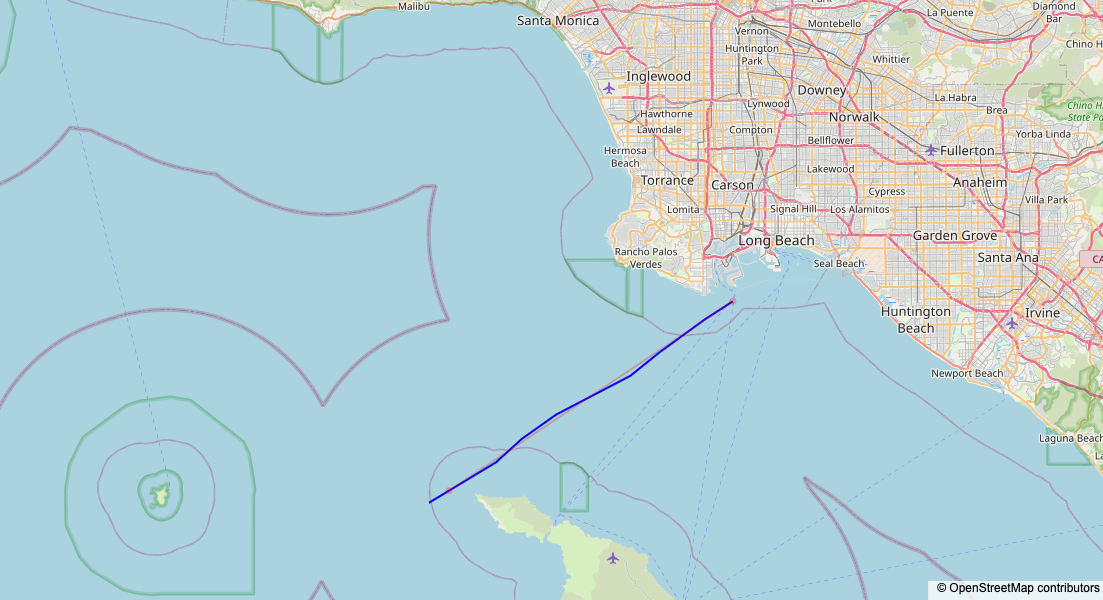

In [25]:
plot_isochron_routes.plot_isochron_routes(rhumb_route=rhumb_route, waypoints=waypoints)

In [26]:
tic = time.time()
try:
    isochrons = weather_routing.route_isochrons(waypoints,start_date=Start_Date, start_time=Start_Time, wind_data_dir=wind_data_dir)
except Exception as e:
    print(e)
print(f"finished in {time.time()-tic:.2f}s")

========== routing to waypoint 1 ===========
t=1 dtw=20.381 sog=3.683 #routes=7 time=0.00
t=2 dtw=17.842 sog=3.220 #routes=11 time=0.01
t=3 dtw=15.256 sog=3.496 #routes=18 time=0.01
t=4 dtw=12.165 sog=4.040 #routes=27 time=0.02
t=5 dtw=8.307 sog=4.602 #routes=25 time=0.03
t=6 dtw=4.859 sog=4.680 #routes=29 time=0.02
t=7 dtw=1.856 sog=4.413 #routes=34 time=0.03 === found waypoint
total compute time=0.03s
finished in 0.12s


In [27]:
min_route = None
for route in isochrons[-1]:
    #print(route[-1]['dtw'])
    if min_route is None or route[-1]['dtw'] < min_route[-1]['dtw']:
        min_route = route


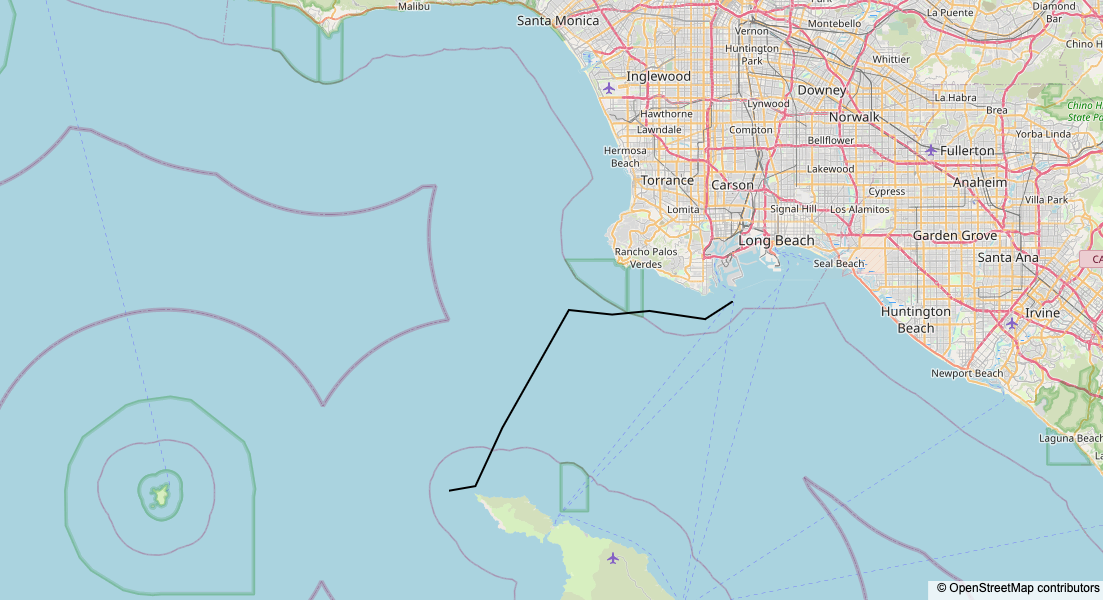

In [28]:
#plot_isochron_routes.plot_isochron_routes(isochrons=isochrons, waypoints=waypoints, min_route=isochrons[-1][0])
#plot_isochron_routes.plot_isochron_routes(min_route=isochrons[-1][0])
plot_isochron_routes.plot_isochron_routes(min_route=min_route)


In [66]:
#plot_isochron_routes.plot_isochron_routes(isochrons=isochrons[-3:-1])


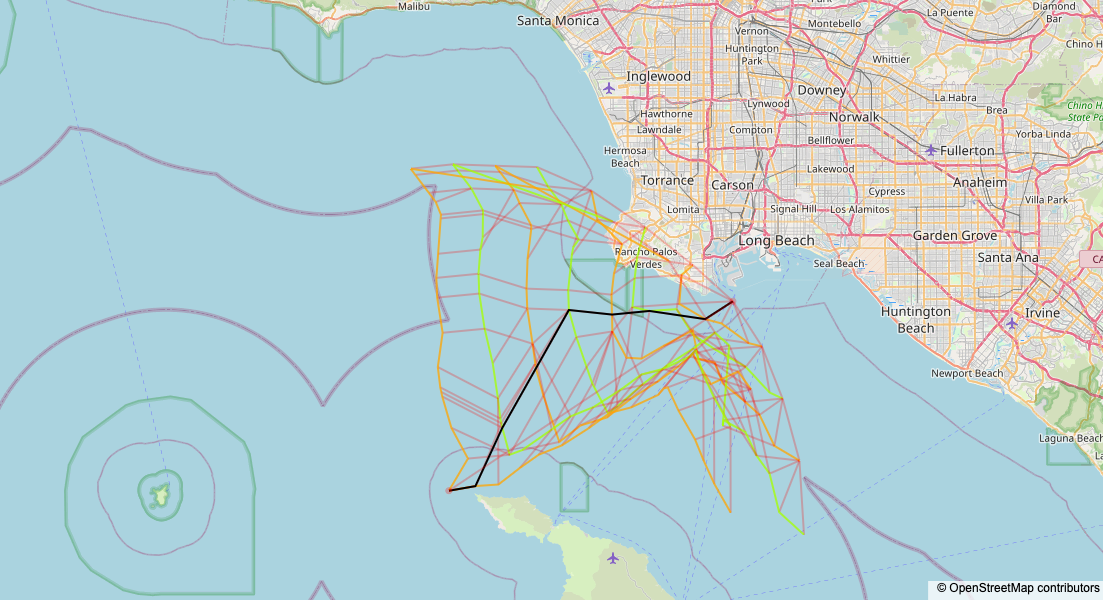

In [29]:
plot_isochron_routes.plot_isochron_routes(isochrons=isochrons, waypoints=waypoints, min_route=isochrons[-1][0])


In [40]:
stats = cProfile.run('weather_routing.route_isochrons(waypoints,start_date=Start_Date, start_time=Start_Time, wind_data_dir=wind_data_dir)', sort='cumtime')


========== routing to waypoint 1 ===========
t=1 dtw=20.381 sog=3.683 #routes=7 time=0.00
t=2 dtw=17.842 sog=3.220 #routes=11 time=0.02
t=3 dtw=15.256 sog=3.496 #routes=18 time=0.02
t=4 dtw=12.165 sog=4.040 #routes=27 time=0.03
t=5 dtw=8.307 sog=4.602 #routes=25 time=0.05
t=6 dtw=4.859 sog=4.680 #routes=29 time=0.04
t=7 dtw=1.856 sog=4.413 #routes=34 time=0.05 === found waypoint
total compute time=0.05s
         414610 function calls (414575 primitive calls) in 0.230 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      2/1    0.005    0.003    0.225    0.225 {built-in method builtins.exec}
        7    0.024    0.003    0.222    0.032 weather_routing.py:118(take_isochron_step)
        1    0.000    0.000    0.220    0.220 <string>:1(<module>)
        1    0.000    0.000    0.218    0.218 weather_routing.py:39(route_isochrons)
     4035    0.020    0.000    0.101    0.000 weather_routing.py:1242(angle_between_segments)
  

In [36]:
?stats

Type:        NoneType
String form: None
Docstring:   The type of the None singleton.

In [6]:
%%flame
weather_routing.route_isochrons(waypoints,start_date=Start_Date, start_time=Start_Time, wind_data_dir=wind_data_dir)

========== routing to waypoint 1 ===========
t=1 dtw=20.381 sog=3.683 #routes=7 time=0.01
t=2 dtw=17.842 sog=3.220 #routes=11 time=0.01
t=3 dtw=15.256 sog=3.496 #routes=18 time=0.02
t=4 dtw=12.165 sog=4.040 #routes=27 time=0.03
t=5 dtw=8.307 sog=4.602 #routes=25 time=0.04
t=6 dtw=4.859 sog=4.680 #routes=29 time=0.04
t=7 dtw=1.856 sog=4.413 #routes=34 time=0.05 === found waypoint
total compute time=0.05s
 

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/bdrawert/Desktop/research/weather_routing/venv/lib/python3.13/site-packages/flameprof.py", line 404, in <module>
    render(s.stats, get_out(args.out), args.format, args.threshold / 100,
    ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
           args.width, args.row_height, args.font_size, args.log_mult)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bdrawert/Desktop/research/weather_routing/venv/lib/python3.13/site-packages/flameprof.py", line 305, in render
    blocks, bblocks, maxw = prepare(funcs, calls, threshold=threshold)
                            ~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bdrawert/Desktop/research/weather_routing/venv/lib/python3.13/site-packages/flameprof.py", line 232, in prepare
    _calc_back((f for f in funcs if f != 'root'

CalledProcessError: Command '['flameprof', '/var/folders/63/0syx5ts177gcl1c62wf8lbywrc37vm/T/tmp9vlq0fcw/temp_prof.prof']' returned non-zero exit status 1.